In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import BoundaryNorm
from astropy.io import fits
from matplotlib import ticker
from pathlib import Path
import os
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
os.chdir('two_moments')

In [3]:
import glob
SAMI_FITS = glob.glob("*.fits")

In [5]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = [16,4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"text.usetex": False})
plt.rcParams.update({'font.size': 14})

C:\Users\hepbu\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\hepbu\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


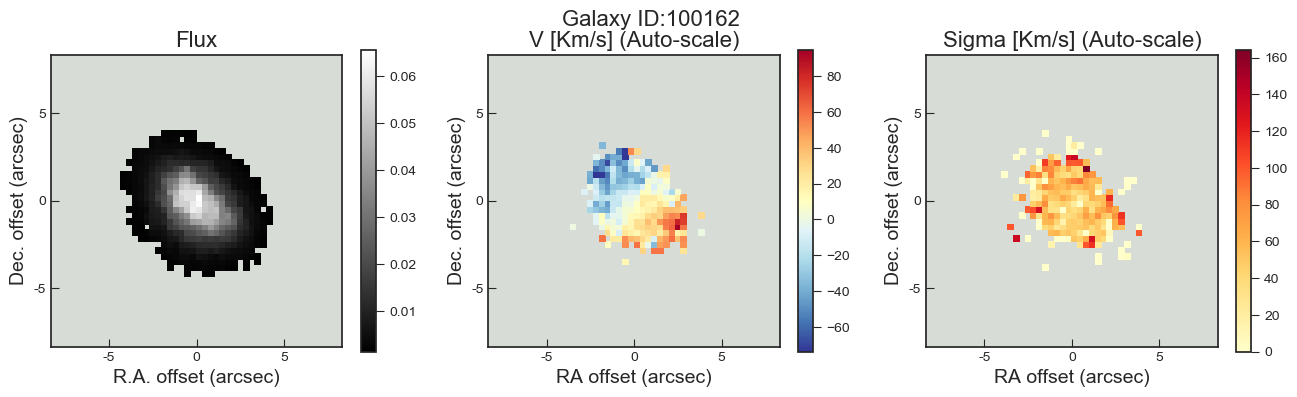

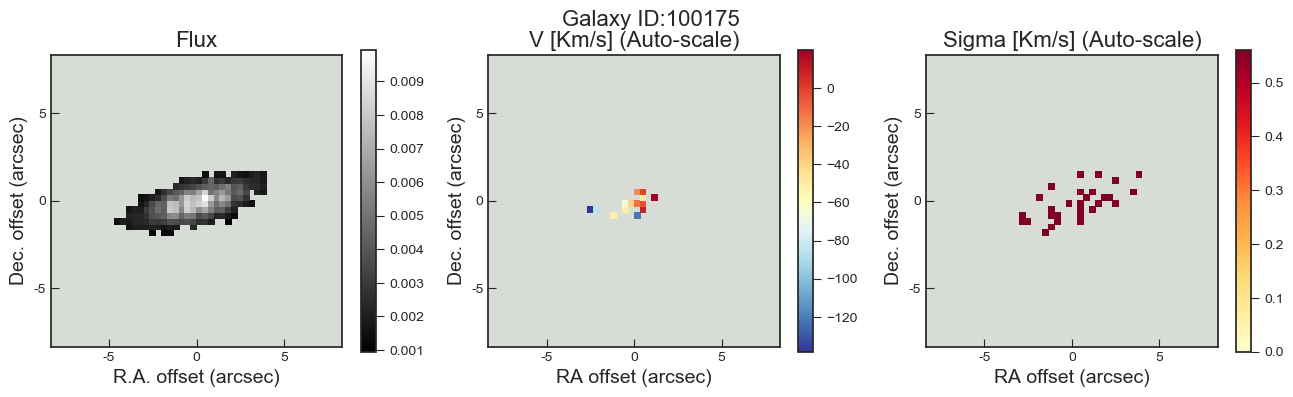

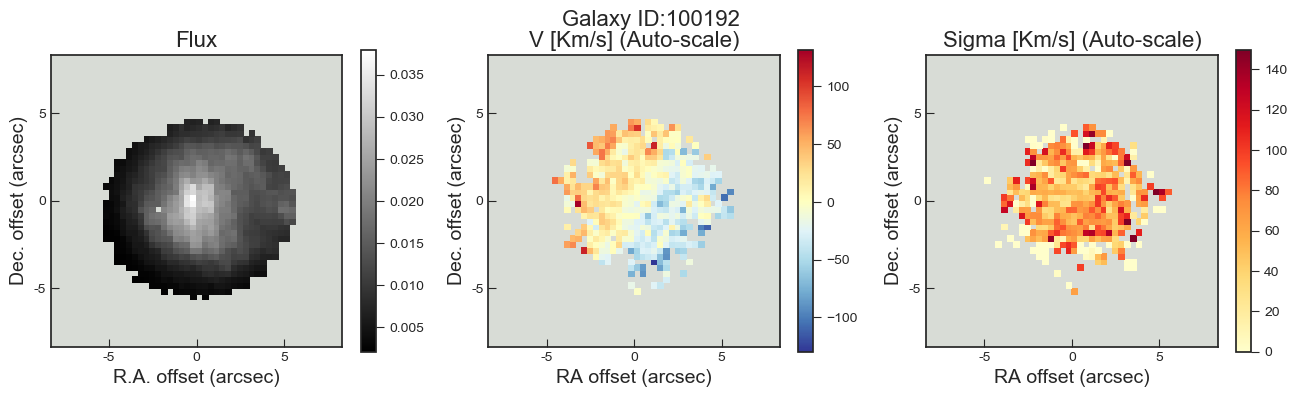

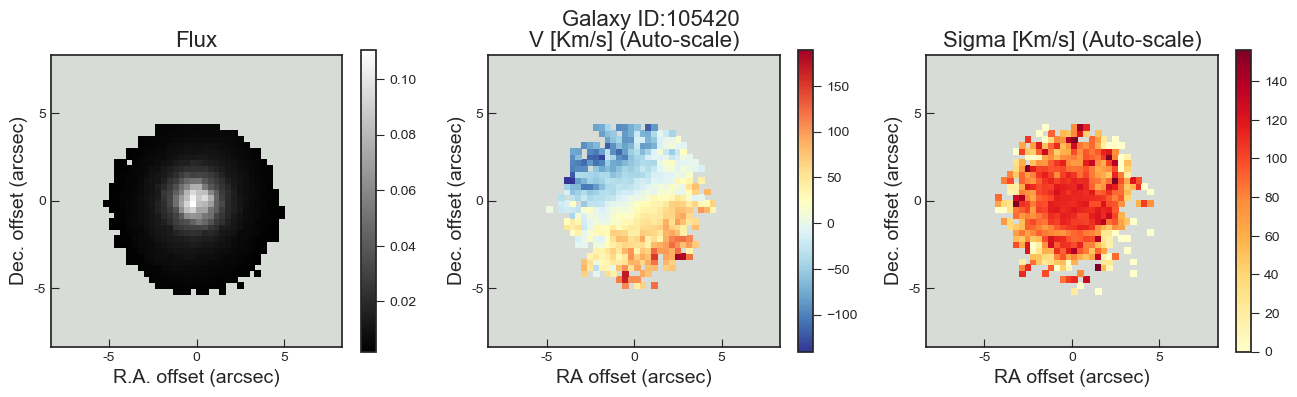

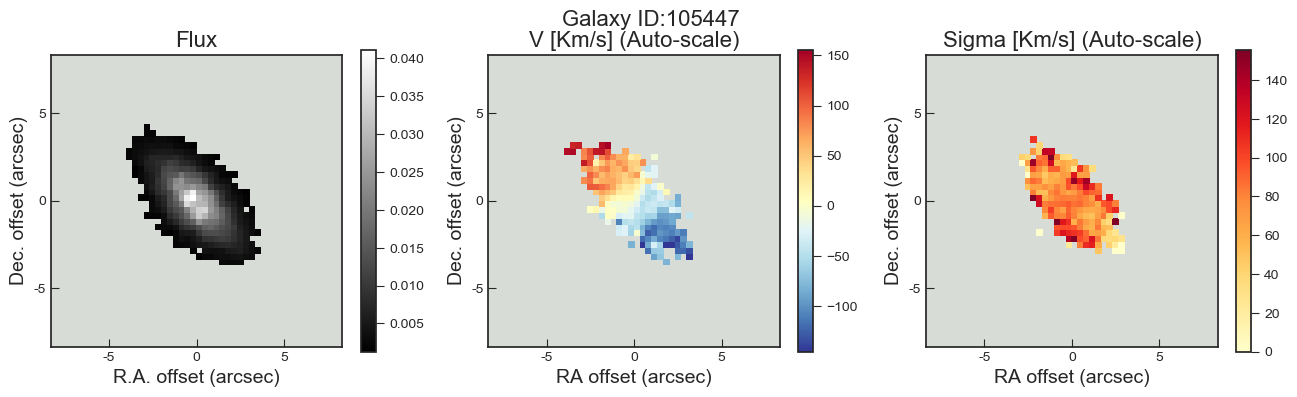

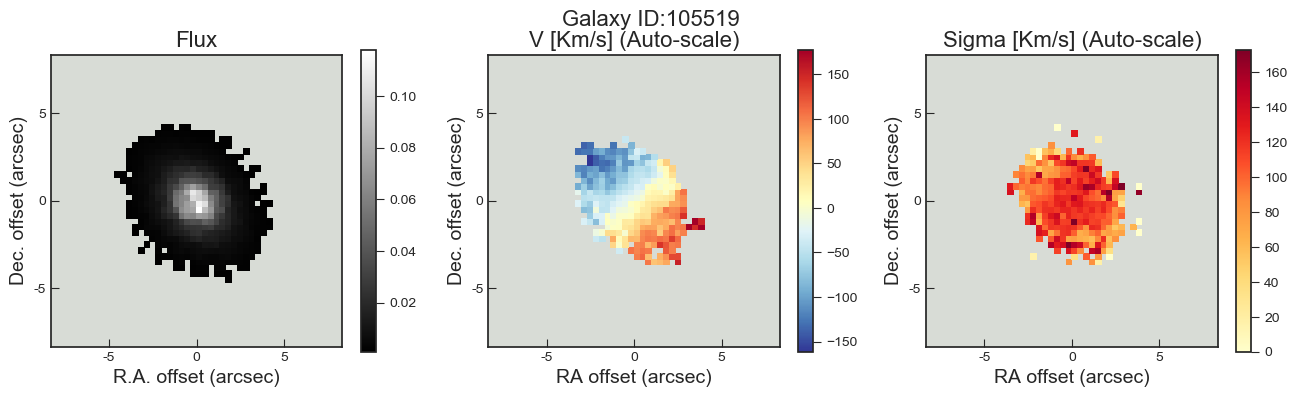

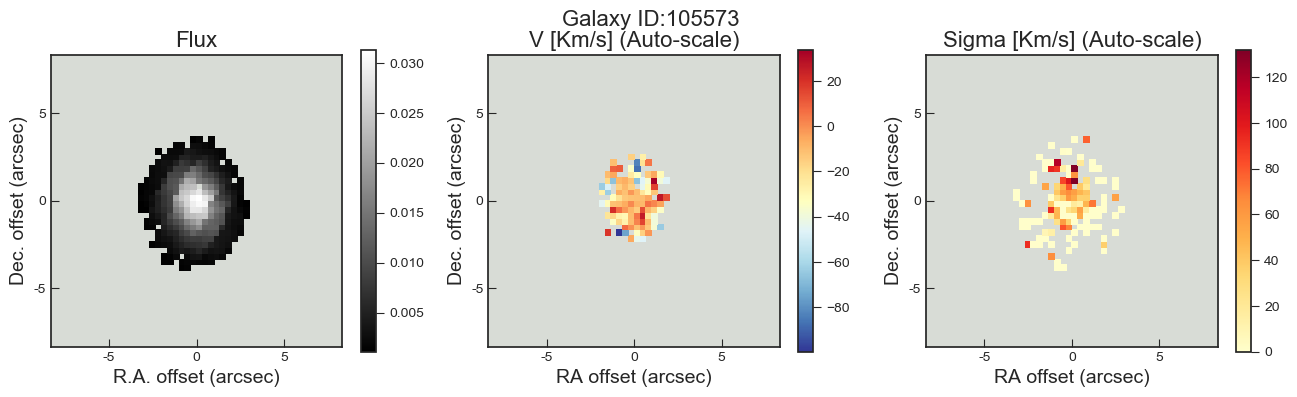

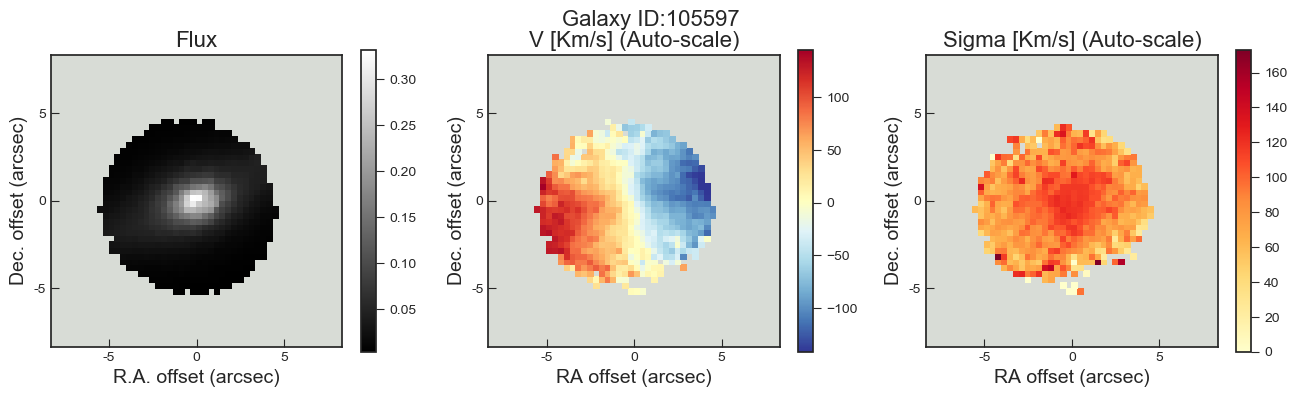

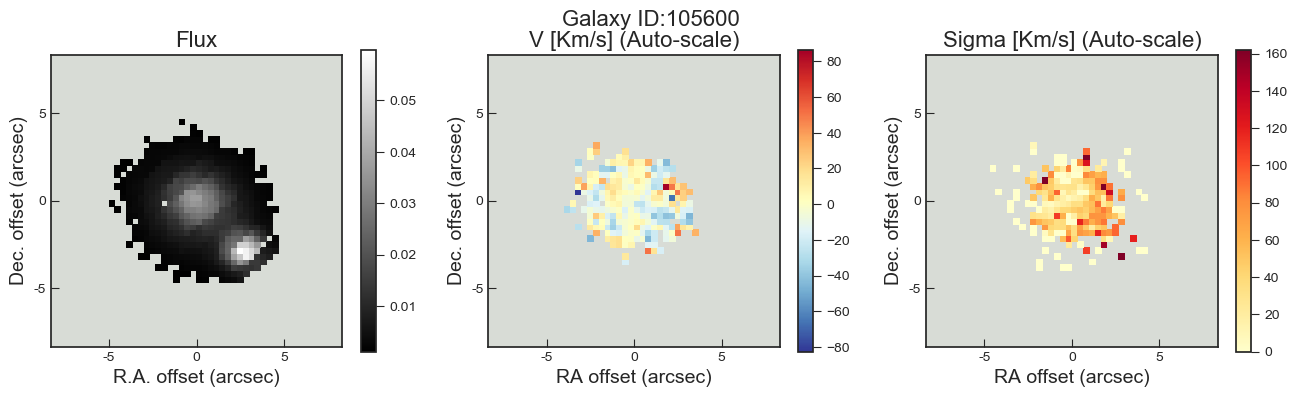

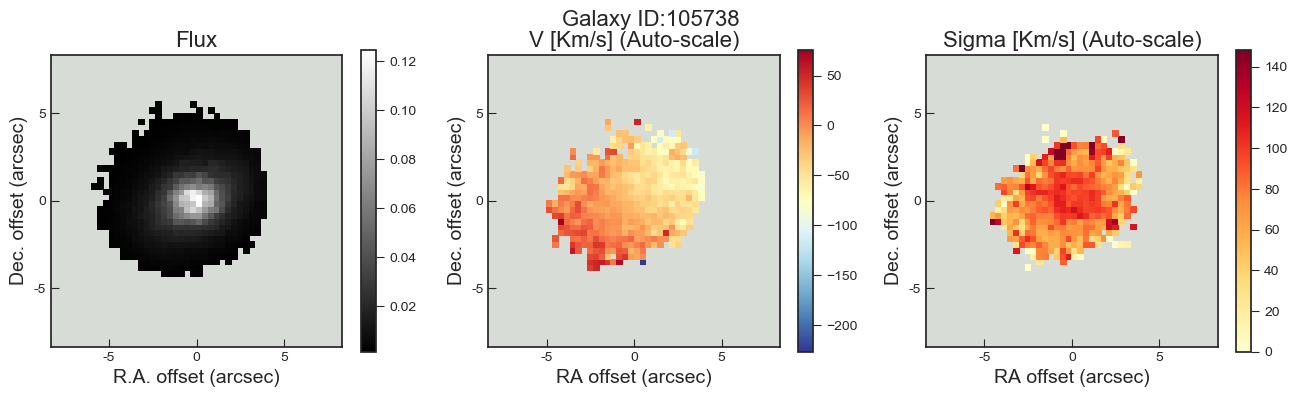

In [48]:
pp = PdfPages('multipage_attempt5.pdf')

for a in range (0,10):
    data_folder = Path()
    file_to_open = data_folder / SAMI_FITS[a]
    hdul = fits.open(file_to_open)
    FLUX = hdul[1].data
    VMAP = hdul[3].data
    VEL_ERR = hdul[4].data
    SIG = hdul[5].data
    SIG_ERR = hdul[6].data
    SIG_ERR_NEW = np.where(SIG_ERR < SIG*0.1 +25, 1, np.NaN)
    SIG_GOOD_1 = np.multiply(SIG,SIG_ERR_NEW)
    VEL_ERR_NEW = np.where(VEL_ERR < 30, 1, np.NaN)
    SIG_GOOD = np.multiply(SIG_GOOD_1, VEL_ERR_NEW)
    VMAP_GOOD = np.multiply(VMAP,VEL_ERR_NEW)
    
    fig, axs = plt.subplots(1,3)

    F = axs[0].pcolor(FLUX, cmap = 'gray')
    axs[0].set_title('Flux', fontsize = 16)
    axs[0].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
    axs[0].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(F, ax=axs[0])
    axs[0].set_aspect('equal', 'box')
    axs[0].set_facecolor('xkcd:light grey')
    axs[0].set_xticks([10, 25, 40])
    axs[0].set_xticklabels([-5, 0, 5])
    axs[0].set_yticks([10, 25, 40])
    axs[0].set_yticklabels([-5, 0, 5])
    axs[0].tick_params(direction = 'in')
    fig.suptitle('Galaxy ID:' + hdul[0].header[14] , fontsize=16)
    
    D = axs[1].pcolor(VMAP_GOOD, cmap= 'RdYlBu_r', vmax = 0.95*np.nanmax(VMAP_GOOD), vmin = 0.95*np.nanmin(VMAP_GOOD))
    axs[1].set_title('V [Km/s] (Auto-scale)', fontsize = 16)
    axs[1].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[1].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(D, ax=axs[1])
    axs[1].set_aspect('equal', 'box')
    axs[1].set_facecolor('xkcd:light grey')
    axs[1].set_xticks([10, 25, 40])
    axs[1].set_xticklabels([-5, 0, 5])
    axs[1].set_yticks([10, 25, 40])
    axs[1].set_yticklabels([-5, 0, 5])
    axs[1].tick_params(direction = 'in')

    V = axs[2].pcolor(SIG_GOOD_1, cmap= 'YlOrRd', vmin = 0, vmax = 0.95*np.nanmax(SIG_GOOD))
    axs[2].set_title('Sigma [Km/s] (Auto-scale)', fontsize = 16)
    axs[2].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[2].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    axs[2].set_aspect('equal', 'box')
    fig.colorbar(V, ax=axs[2])
    axs[2].set_facecolor('xkcd:light grey')
    axs[2].set_xticks([10, 25, 40])
    axs[2].set_xticklabels([-5, 0, 5])
    axs[2].set_yticks([10, 25, 40])
    axs[2].set_yticklabels([-5, 0, 5])
    axs[2].tick_params(direction = 'in')
    
    pp.savefig()
pp.close()

    

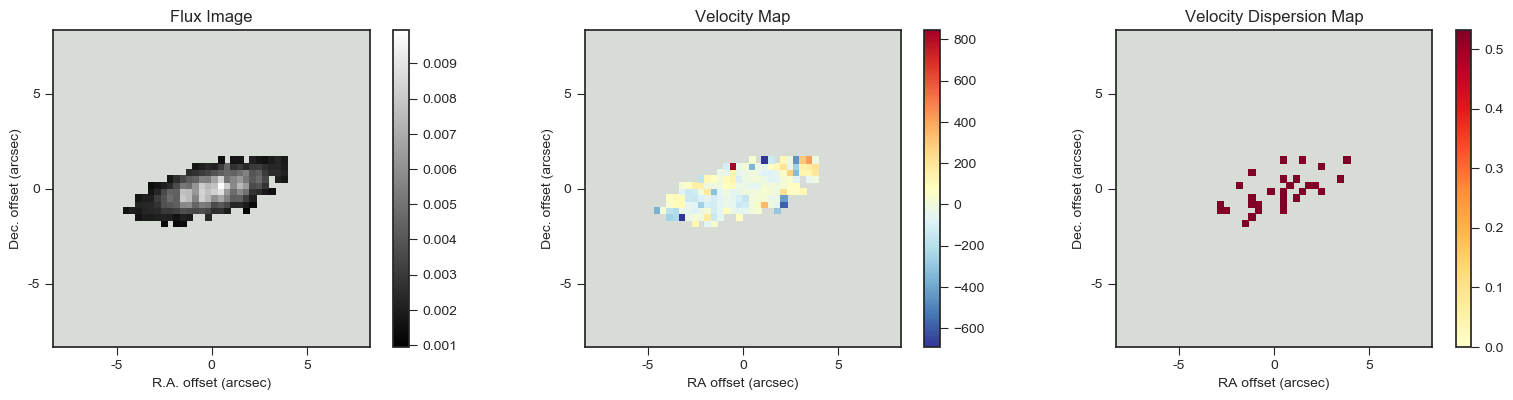

In [41]:
fig, axs = plt.subplots(1,3)

F = axs[0].pcolor(FLUX, cmap = 'gray')
axs[0].set_title('Flux Image')
axs[0].set_xlabel('R.A. offset (arcsec)')
axs[0].set_ylabel('Dec. offset (arcsec)')
fig.colorbar(F, ax=axs[0])
axs[0].set_aspect('equal', 'box')
axs[0].set_facecolor('xkcd:light grey')
axs[0].set_xticks([10, 25, 40])
axs[0].set_xticklabels([-5, 0, 5])
axs[0].set_yticks([10, 25, 40])
axs[0].set_yticklabels([-5, 0, 5])

D = axs[1].pcolor(VMAP_GOOD, cmap= 'RdYlBu_r', vmax = 0.95*np.nanmax(VMAP_GOOD), vmin = 0.95*np.nanmin(VMAP_GOOD))
axs[1].set_title('Velocity Map')
axs[1].set_xlabel('RA offset (arcsec)')
axs[1].set_ylabel('Dec. offset (arcsec)')
fig.colorbar(D, ax=axs[1])
axs[1].set_aspect('equal', 'box')
axs[1].set_facecolor('xkcd:light grey')
axs[1].set_xticks([10, 25, 40])
axs[1].set_xticklabels([-5, 0, 5])
axs[1].set_yticks([10, 25, 40])
axs[1].set_yticklabels([-5, 0, 5])

V = axs[2].pcolor(SIG_GOOD_1, cmap= 'YlOrRd', vmin = 0, vmax = 0.9*np.nanmax(SIG_GOOD))
axs[2].set_title('Velocity Dispersion Map')
axs[2].set_xlabel('RA offset (arcsec)')
axs[2].set_ylabel('Dec. offset (arcsec)')
axs[2].set_aspect('equal', 'box')
fig.colorbar(V, ax=axs[2])
axs[2].set_facecolor('xkcd:light grey')
axs[2].set_xticks([10, 25, 40])
axs[2].set_xticklabels([-5, 0, 5])
axs[2].set_yticks([10, 25, 40])
axs[2].set_yticklabels([-5, 0, 5])

fig.tight_layout()
plt.show()